In [223]:
"""
pip install pandas
"""

import pandas as pd
import numpy as np

data = pd.Series(
    [1000, 7000, 12000 ], # les données
    dtype='int64' # les types
)
data

cities = pd.Series(
    [249712, 2190327, 232741 ], # valeur de l'objet Series
    index = ['Bordeaux', 'Paris', 'Lille'] # index personnalisés
)
cities

s = pd.Series(np.random.randint(0,40, 10))
s.values

ser = pd.Series( np.arange(4, 8), index=['a', 'b', 'c', 'd'] )
ser['z'] = 14
ser

cities =  pd.Series({
    'Bordeaux' : 249712  ,
    'Paris' : 2190327 ,
    'Lille' : 232741
})
cities['Paris']

"""
transtypage: list(...) 
"""
list(range(1,12,2))
list('abcdef')
numbers = pd.Series(range(1,12,2), list('abcdef'))
numbers

"""
ETL : Extract-Transform-Load
-- Talend Studio
-- ELK Elasticsearch Logstash (Beats) Kibana (Grafana)
-- mlflow
"""
cities =  pd.Series({
    'Bordeaux' : 249712  ,
    'Paris' : 2190327 ,
    'Lille' : 232741
})

# print(cities)
cities = cities.reindex(['Paris', 'Bordeaux', 'Pau'])
cities

a = pd.Series([1,2,3, 4], ['a', 'b', 'c', 'd' ])
b = pd.Series([10,20,30, 40], ['a', 'b', 'f', 'd' ])

a + b

A = pd.Series(
    [12,9,10, 8, 10, 8 , np.nan],
    ['a', 'b', 'c', 'd', 'e', 'f', 'g']
)
A.unique()
A.value_counts()

numbers = pd.Series( [12,6,8,19, 10, np.nan , 14, np.nan] )
numbers.dropna()

A = pd.Series(np.random.random(20))
A.describe()

notes = pd.Series([1, 7, 8, 9, 10, 12, 15, 17, 18, 19 ,20])
effectifs = pd.Series([2,3, 2, 1, 5, 7, 2, 6, 2, 1, 1])

# notes[notes >= 9][notes <= 14]
# notes[notes.where(notes > 14).where(notes < 9).dropna().keys()]
# notes_1 = notes.where(notes >= 9).where(notes <=14).isnull()
# les étudiants qui ont une note > 14 ou < 9
#e1 = effectifs[notes_1].sum()
#e1
total = effectifs.sum()
# notes_1
#(total - effectifs[notes_1].sum()) * 100 / total

# notes_1
# effectifs
notes_1 = notes.where(notes >= 9).where(notes <=14).dropna()
e1 = effectifs.reindex(list(notes_1.index)).sum()
e1 * 100 / total

notes.repeat(effectifs).sum()/effectifs.sum()
(notes * effectifs).sum() / effectifs.sum()

fruits = np.random.choice(['banana', 'apple', 'raspberry'], 15)
fruits
weights = np.linspace(1.0, 2.0, 15)
weights
fseries = pd.Series(weights, index=fruits)
fseries
sums = fseries.groupby(level=0).sum()
print(sums)
fmax = sums[sums.argmax()]
fmax
sums.keys()[sums.argmax()]


apple        14.000000
banana        5.142857
raspberry     3.357143
dtype: float64


'apple'

In [224]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import layers, models

In [225]:
# Import du jeu de données

irisData = pd.read_csv('/content/iris.data')
irisData.head()

,x1,x2,x3,x4,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [255]:
# Mélanger les données
irisData = irisData.sample(frac=1)

# Séparer les entrées des sorties
labels = irisData[['label']]
features = irisData[['x1', 'x2', 'x3', 'x4']]

# Séparer le jeu d'apprentissage du jeu de test
train_X = features[0:135]
print(train_X.shape)
train_y = pd.get_dummies(labels[0:135])
print(pd.get_dummies(train_y.shape))

test_X = features[135:]
print(test_X.shape)
test_y = pd.get_dummies(labels[135:])
print(test_y.shape)
print(pd.get_dummies(test_y))

(135, 4)
   3    135
0    0    1
1    1    0
(15, 4)
(15, 3)
     label_Iris-setosa  label_Iris-versicolor  label_Iris-virginica
83                   0                      1                     0
98                   0                      1                     0
26                   1                      0                     0
59                   0                      1                     0
36                   1                      0                     0
13                   1                      0                     0
25                   1                      0                     0
148                  0                      0                     1
146                  0                      0                     1
105                  0                      0                     1
16                   1                      0                     0
75                   0                      1                     0
14                   1                      0          

In [249]:
# Construction du modèle

"""
model = tf.keras.Sequential(
    layers = [
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(3)
    ]
)
"""

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(4,)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

"""
x = tf.ones((1,4))
print(x)
y = model(x)
print("Number of weights after calling the model:", len(model.weights))  # 6

# model.build(
#    input_shape=
#)
"""

model.summary()


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 64)                320       
                                                                 
 dense_53 (Dense)            (None, 64)                4160      
                                                                 
 dense_54 (Dense)            (None, 3)                 195       
                                                                 
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


In [250]:
# Compiler le modèle

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [251]:
# Entraîner le modèle
print(train_X.shape)
print(train_y.shape)

history = model.fit(train_X, train_y, epochs=1000, batch_size=16)


(135, 4)
(135, 3)
Epoch 1/1000
9/9 [==============================] - 1s 6ms/step - loss: 1.3772 - accuracy: 0.5111
Epoch 2/1000
9/9 [==============================] - 0s 4ms/step - loss: 1.3727 - accuracy: 0.4889
Epoch 3/1000
9/9 [==============================] - 0s 4ms/step - loss: 1.3680 - accuracy: 0.4889
Epoch 4/1000
9/9 [==============================] - 0s 3ms/step - loss: 1.3634 - accuracy: 0.4667
Epoch 5/1000
9/9 [==============================] - 0s 4ms/step - loss: 1.3591 - accuracy: 0.4370
Epoch 6/1000
9/9 [==============================] - 0s 3ms/step - loss: 1.3544 - accuracy: 0.4296
Epoch 7/1000
9/9 [==============================] - 0s 4ms/step - loss: 1.3500 - accuracy: 0.4148
Epoch 8/1000
9/9 [==============================] - 0s 5ms/step - loss: 1.3459 - accuracy: 0.3852
Epoch 9/1000
9/9 [==============================] - 0s 4ms/step - loss: 1.3415 - accuracy: 0.3556
Epoch 10/1000
9/9 [==============================] - 0s 4ms/step - loss: 1.3371 - accuracy: 0.3481
E

<Axes: >

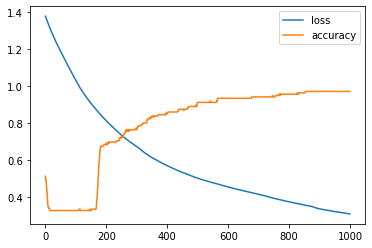

In [252]:
# Evaluation du modèle

pd.DataFrame(history.history).plot()

In [262]:
loss, accuracy = model.evaluate(test_X, test_y, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

y_pred = model.predict(test_X)
print(y_pred)
actual = np.argmax(np.array(test_y),axis=1)
predicted = np.argmax(y_pred,axis=1)
print(f"Actual: {actual}")
print(f"Predicted: {predicted}")


Test loss: 0.28529414534568787
Test accuracy: 0.9333333373069763
1/1 [==============================] - 0s 43ms/step
[[6.8176212e-03 3.4683013e-01 6.4635229e-01]
 [1.5049174e-01 6.1573261e-01 2.3377568e-01]
 [9.3586522e-01 4.8236184e-02 1.5898589e-02]
 [3.6034431e-02 5.3759587e-01 4.2636967e-01]
 [9.6829635e-01 2.3522647e-02 8.1809163e-03]
 [9.3903333e-01 4.2728517e-02 1.8238224e-02]
 [9.1817176e-01 6.1744299e-02 2.0083940e-02]
 [4.1337213e-03 2.4771686e-01 7.4814951e-01]
 [5.4659145e-03 3.5623598e-01 6.3829809e-01]
 [9.7105681e-04 2.2194375e-01 7.7708519e-01]
 [9.7294068e-01 1.9898886e-02 7.1604396e-03]
 [3.1186143e-02 7.0786285e-01 2.6095104e-01]
 [9.8097169e-01 1.4120967e-02 4.9073170e-03]
 [9.3597150e-01 4.7384430e-02 1.6644141e-02]
 [7.2992027e-02 6.5803403e-01 2.6897395e-01]]
Actual: [1 1 0 1 0 0 0 2 2 2 0 1 0 0 1]
Predicted: [2 1 0 1 0 0 0 2 2 2 0 1 0 0 1]
